In [6]:
import pandas as pd
import pandas as pd
import numpy as np

df = pd.DataFrame({'student_id'  :[100, 101, 102],
                  'q1.cta1_count':[0, 1, 1],
                  'q1.cta1_date' :[np.nan, '2019-03-26', '2019-03-25' ],
                  'q1.cta1.reminder_count' :[0, 1, 0],
                  'q1.cta1.reminder_date'  :[np.nan, '2019-03-31', np.nan]})
df.melt(id_vars=['student_id','q1.cta1_count','q1.cta1_date'])

,student_id,q1.cta1_count,q1.cta1_date,variable,value
0,100,0,NaN,q1.cta1.reminder_count,0
1,101,1,2019-03-26,q1.cta1.reminder_count,1
2,102,1,2019-03-25,q1.cta1.reminder_count,0
3,100,0,NaN,q1.cta1.reminder_date,NaN
4,101,1,2019-03-26,q1.cta1.reminder_date,2019-03-31
5,102,1,2019-03-25,q1.cta1.reminder_date,NaN


In [148]:
query_string="'a as aa','b as bb','c as cc'"

# split and pass
column_expr = query_string.replace("'", "").split(",")
column_expr

['a as aa', 'b as bb', 'c as cc']

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

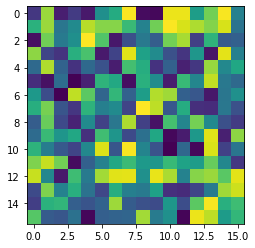

In [107]:
import matplotlib.pyplot as plt
import random
# x_range = [random.randint(0,100) for i in range(20000)] 
# y_range = [random.randint(0,100) for i in range(20000)][::-1]
# Avgs = [random.randint(0,100) for i in range(20000)]
# plt.figure(figsize = (10,8))
# plt.scatter(x_range, y_range, s=1, c=Avgs, cmap = 'hot')
# plt.colorbar().set_label('Avgs', fontsize=14)
# plt.xlabel('x', fontsize=14)
# plt.ylabel('y', fontsize=14)
# plt.title('ToA heatmap', fontsize=17)
# plt

import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='viridis', interpolation='nearest')
plt

In [36]:
import pandas as pd
df = pd.read_clipboard(sep = '\s+')
df



,txt1,txt2
0,hello,that
1,hi,these
2,sure,sure
3,there,hello


In [11]:
import requests
from bs4 import BeautifulSoup
header = {  'authority' :'usoncology.com',
  'upgrade-insecure-requests' :'1',
  'user-agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36',
  'accept' :'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
  'sec-fetch-site' :'same-origin',
  'sec-fetch-mode' :'navigate',
  'sec-fetch-user' :'?1',
  'sec-fetch-dest' :'document',
  'referer' :'https://usoncology.com/patients/find-a-location/',
  'accept-language' :'en-US,en;q=0.9',
  'cookie' :'visid_incap_969512=qwWcAS7hTdOJUmIhnQiIaB/kdV8AAAAAQUIPAAAAAABjOJrYe4LfnIeM5F7AywhS; __usonBlocker=physicians; incap_ses_1252_969512=peJwAEuFrhMGtBzGqv9fESoPdl8AAAAAvxvDqa/3uT56WEaV6FW9bg=='}
arr = []

for i in range(1,50):
    k = requests.get("https://usoncology.com/patients/find-a-location/page/"+str(i)+"/",headers = header)
    arr.append(k.text)

In [32]:
soup = BeautifulSoup(arr[0])
for i in soup.findAll('div',{'class':"columns large-6"}):
    print(i.h2.text.strip().replace("\n",""))
    print(i.p.text.strip().replace("\n",""))

Texas Urology Specialists – Midlothian
2220 Bryan Place                Midlothian, TX 75065                972-780-0480
Silicon Valley Oncology
2165 S. Bascom Ave.                Campbell, CA 95008                408-963-5500
Texas Oncology – Arlington Cancer Center North
906 West Randol Mill Road                Arlington, TX 76012                8176649600
Texas Oncology Surgical Specialists- Carrollton
4352 N. Josey Lane                Carrollton, TX 75010                214-826-9873
Texas Breast Specialists – Plano Willow Bend
5920 W. Parker Rd.                Plano, TX 75093                214-491-5858
Texas Oncology – El Campo
305 Sandy Corner Rd.                 El Campo, TX 77437                (281) 277-5200
Texas Urology Specialists – Austin Midtown
901 W. 38th St.                Austin, TX 78705                512-421-4235
Texas Urology Specialists – Webster
400 W. Medical Center Blvd., Suite 245                Webster, TX 77598                281-316-4978
Texas Breast Specia

In [147]:
import re

regex = r"""
	(?P<json>(?>\s*(?&object)\s*|\s*(?&array)\s*))
	(?P<object>(?>\{\s*(?>(?&pair)(?>\s*,\s*(?&pair))*)?\s*\}))
	(?P<pair>(?>(?&STRING)\s*:\s*(?&value)))
	(?P<array>(?>\[\s*(?>(?&value)(?>\s*,\s*(?&value))*)?\s*\]))
	(?P<value>(?>true|false|null|(?&STRING)|(?&NUMBER)|(?&object)|(?&array)))
	(?<STRING>(?>"(?>\\(?>["\\\/bfnrt]|u[a-fA-F0-9]{4})|[^"\\\0-\x1F\x7F]+)*"))
	(?<NUMBER>(?>-?(?>0|[1-9][0-9]*)(?>\.[0-9]+)?(?>[eE][+-]?[0-9]+)?))
	)
	\A(?&json)\z
	"""

test_str = ("[\n"
	"    \"JSON Test Pattern pass1\",\n"
	"    {\"object with 1 member\":[\"array with 1 element\"]},\n"
	"    {},\n"
	"    [],\n"
	"    -42,\n"
	"    true,\n"
	"    false,\n"
	"    null,\n"
	"    {\n"
	"        \"integer\": 1234567890,\n"
	"        \"real\": -9876.543210,\n"
	"        \"e\": 0.123456789e-12,\n"
	"        \"E\": 1.234567890E+34,\n"
	"        \"\":  23456789012E66,\n"
	"        \"zero\": 0,\n"
	"        \"one\": 1,\n"
	"        \"space\": \" \",\n"
	"        \"quote\": \"\\\"\",\n"
	"        \"backslash\": \"\\\\\",\n"
	"        \"controls\": \"\\b\\f\\n\\r\\t\",\n"
	"        \"slash\": \"/ & \\/\",\n"
	"        \"alpha\": \"abcdefghijklmnopqrstuvwyz\",\n"
	"        \"ALPHA\": \"ABCDEFGHIJKLMNOPQRSTUVWYZ\",\n"
	"        \"digit\": \"0123456789\",\n"
	"        \"0123456789\": \"digit\",\n"
	"        \"special\": \"`1~!@#$%^&*()_+-={':[,]}|;.</>?\",\n"
	"        \"hex\": \"\\u0123\\u4567\\u89AB\\uCDEF\\uabcd\\uef4A\",\n"
	"        \"true\": true,\n"
	"        \"false\": false,\n"
	"        \"null\": null,\n"
	"        \"array\":[  ],\n"
	"        \"object\":{  },\n"
	"        \"address\": \"50 St. James Street\",\n"
	"        \"url\": \"http://www.JSON.org/\",\n"
	"        \"comment\": \"// /* <!-- --\",\n"
	"        \"# -- --> */\": \" \",\n"
	"        \" s p a c e d \" :[1,2 , 3\n\n"
	",\n\n"
	"4 , 5        ,          6           ,7        ],\"compact\":[1,2,3,4,5,6,7],\n"
	"        \"jsontext\": \"{\\\"object with 1 member\\\":[\\\"array with 1 element\\\"]}\",\n"
	"        \"quotes\": \"&#34; \\u0022 %22 0x22 034 &#x22;\",\n"
	"        \"\\/\\\\\\\"\\uCAFE\\uBABE\\uAB98\\uFCDE\\ubcda\\uef4A\\b\\f\\n\\r\\t`1~!@#$%^&*()_+-=[]{}|;:',./<>?\"\n"
	": \"A key can be any string\"\n"
	"    },\n"
	"    0.5 ,98.6\n"
	",\n"
	"99.44\n"
	",\n\n"
	"1066,\n"
	"1e1,\n"
	"0.1e1,\n"
	"1e-1,\n"
	"1e00,2e+00,2e-00\n"
	",\"rosebud\"]")

matches = re.search(regex, test_str, re.VERBOSE)

if matches:
    print ("Match was found at {start}-{end}: {match}".format(start = matches.start(), end = matches.end(), match = matches.group()))
    
    for groupNum in range(0, len(matches.groups())):
        groupNum = groupNum + 1
        
        print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = matches.start(groupNum), end = matches.end(groupNum), group = matches.group(groupNum)))

# Note: for Python 2.7 compatibility, use ur"" to prefix the regex and u"" to prefix the test string and substitution.

error: unknown extension ?> at position 12 (line 2, column 12)

In [141]:
html = """<!DOCTYPE html>
<html>
    <head>
        <title>my title</title>
    </head>
    <body style="background: url(resources/3ddc7sd33330.png);">    
        <noscript>      
    <p style="z-index:100000;background-color:white">
            </p>    
        </noscript>

        <script type="text/javascript" src="resources/bar.js" charset="UTF-8"></script>
        <script type="text/javascript" src="resources/foo.js" charset="UTF-8"></script>    
        <script type="text/javascript">      if( This.Is.A.Function.getInstance().isSupported() ) {        and.calls.another.function( { "head": { "url": "app;jsessionid=213423452534534534" }, "operations": [ ["call", "foo()"], ["call", "bar(myApp)"] ] };      }     
        </script>  
    </body>
</html>"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
script = soup.findAll('script',{"type":"text/javascript"})[2].decode_contents()
script

'      if( This.Is.A.Function.getInstance().isSupported() ) {        and.calls.another.function( { "head": { "url": "app;jsessionid=213423452534534534" }, "operations": [ ["call", "foo()"], ["call", "bar(myApp)"] ] };      }     \n        '

Rectangle(xy=(0, -0.4), width=9, height=0.4, angle=0)
Rectangle(xy=(0, 0.6), width=8, height=0.4, angle=0)
Rectangle(xy=(0, 1.6), width=10, height=0.4, angle=0)
Rectangle(xy=(0, 2.6), width=13, height=0.4, angle=0)
Rectangle(xy=(0, 3.6), width=11, height=0.4, angle=0)
Rectangle(xy=(0, 4.6), width=7, height=0.4, angle=0)
Rectangle(xy=(0, 5.6), width=16, height=0.4, angle=0)
Rectangle(xy=(0, 6.6), width=15, height=0.4, angle=0)
Rectangle(xy=(0, 7.6), width=18, height=0.4, angle=0)
Rectangle(xy=(0, 8.6), width=9, height=0.4, angle=0)
Rectangle(xy=(0, 9.6), width=8, height=0.4, angle=0)
Rectangle(xy=(0, -2.77556e-17), width=20, height=0.4, angle=0)
Rectangle(xy=(0, 1), width=10, height=0.4, angle=0)
Rectangle(xy=(0, 2), width=9, height=0.4, angle=0)
Rectangle(xy=(0, 3), width=11, height=0.4, angle=0)
Rectangle(xy=(0, 4), width=12, height=0.4, angle=0)
Rectangle(xy=(0, 5), width=10, height=0.4, angle=0)
Rectangle(xy=(0, 6), width=10, height=0.4, angle=0)
Rectangle(xy=(0, 7), width=9, height

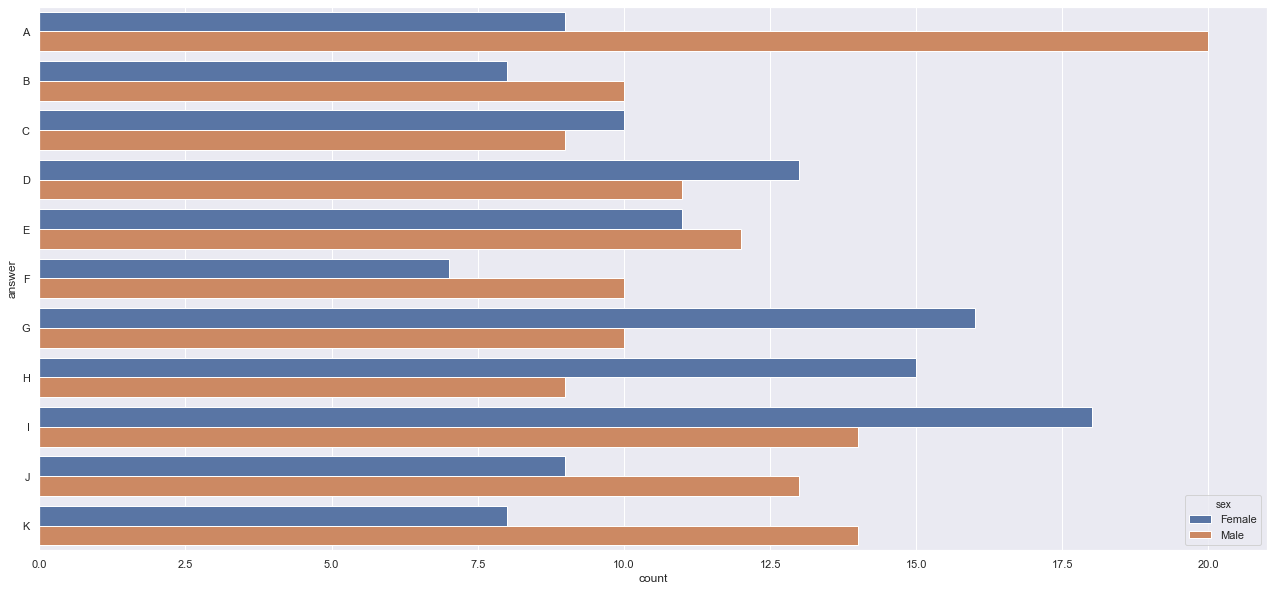

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from IPython.display import display

lo = 0
hi = 10
size = 256
random.seed(1)

answer = [random.randint(lo, hi) for _ in range(size)]
sex = [random.randint(0, 1) for _ in range(size)]

data = {'sex': sex, 'answer': answer} 
df = pd.DataFrame(data)

di = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',
      6:'G',7:'H',8:'I',9:'J',10:'K'}
df = df.replace({'answer': di})

di = {0:'Male',1:'Female'}
df = df.replace({'sex': di})
df = df.sort_values(by=['answer','sex'])
x = df.groupby(['sex','answer']).agg( count=('answer', 'size') ).reset_index()
ax = sns.barplot(x='count', y='answer', hue='sex', data=x)
for p in ax.patches[]:
    print(p)
    

In [131]:
p.get_bbox().get_points()

array([[ 0. , 10. ],
       [14. , 10.4]])

In [53]:
import pandas as pd
df = pd.read_html('http://www.sharecsv.com/s/020ac800b8f194494fd21a7a79ad9499/df.csv')
df =df[0]
df[::2]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,row ID,index,Architecture,Building,City,Downtown,Freeway,Metropolis,Road,Spire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,row ID,index,Building,Condo,Cottage,Grass,House,Housing,Neighborhood,Picture Window,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,row ID,index,Anther,Blossom,Dahlia,Daisies,Daisy,Flower,Plant,Pollen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,row ID,index,Apparel,Baby,Blonde,Child,Clothing,Face,Female,Girl,...,Photography,Portrait,Selfie,Smile,Teen,Teeth,Woman,NaN,NaN,NaN
8,row ID,index,Abies,Building,Conifer,Fir,Housing,Ice,Lake,Land,...,Plant,Scenery,Sea,Shoreline,Slope,Snow,Tree,Vegetation,Water,Wilderness
10,row ID,index,Abyssinian,Animal,Cat,Couch,Furniture,Kitten,Mammal,Manx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
>>> mylist = [['Installation', '64%'], ['C2', '14%'], ['NA', '14%'], ['C2', '14%'], ['NA', '14%'], ['na', '7%']]
>>> seen = set()
>>> newlist = []
>>> for item in mylist:
...     t = tuple(item)
...     if t not in seen:
...         newlist.append(item)
...         seen.add(t)
...
>>> newlist
[['Installation', '64%'], ['C2', '14%'], ['NA', '14%'], ['na', '7%']]

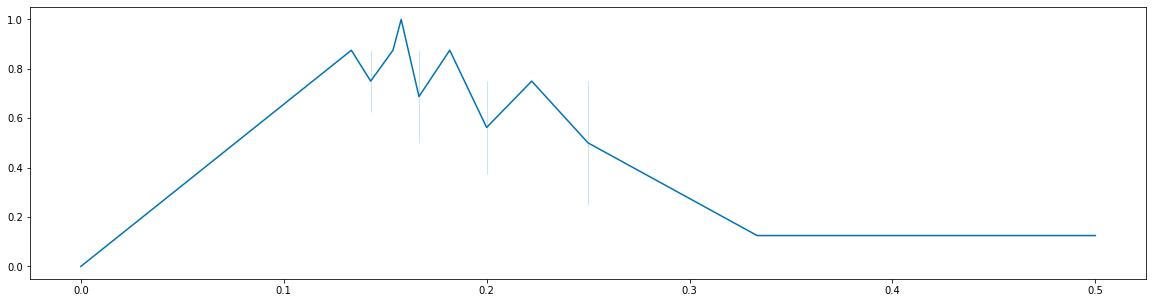

In [120]:
import numpy as np
data_groups = {
    'ap=0.16: cat_3 (4/19)': {
        'precision': np.array([0.        , 0.        , 0.        , 0.        , 0.2       ,
                               0.16666667, 0.14285714, 0.25      , 0.22222222, 0.2       ,
                               0.18181818, 0.16666667, 0.15384615, 0.14285714, 0.13333333,
                               0.21052632], dtype=np.float64),
        'recall': np.array([0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.5 , 0.5 , 0.5 , 0.5 ,
                            0.5 , 0.5 , 0.5 , 0.5 , 1.  ], dtype=np.float64),
    },
    'ap=0.20: cat_1 (3/19)': {
        'precision': np.array([0.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
                               0.16666667, 0.14285714, 0.25      , 0.22222222, 0.2       ,
                               0.18181818, 0.16666667, 0.15384615, 0.14285714, 0.13333333,
                               0.15789474], dtype=np.float64),
        'recall': np.array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
                            0.33333333, 0.33333333, 0.66666667, 0.66666667, 0.66666667,
                            0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
                            1.        ], dtype=np.float64),
    },
    'ap=0.54: cat_2 (8/19)': {
        'precision': np.array([0.        , 0.5       , 0.33333333, 0.5       , 0.6       ,
                               0.66666667, 0.71428571, 0.75      , 0.66666667, 0.6       ,
                               0.63636364, 0.58333333, 0.53846154, 0.5       , 0.46666667,
                               0.42105263], dtype=np.float64),
        'recall': np.array([0.   , 0.125, 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.75 ,
                            0.75 , 0.875, 0.875, 0.875, 0.875, 0.875, 1.   ], dtype=np.float64),
    },
}
import pandas as pd
longform = []
for key, subdata in data_groups.items():
    subdata = pd.DataFrame.from_dict(subdata)
    subdata['label'] = key
    longform.append(subdata)
data = pd.concat(longform)

import seaborn as sns
sns.lineplot(x=data_groups['ap=0.20: cat_1 (3/19)']['precision'],y=data_groups['ap=0.54: cat_2 (8/19)']['recall']) 


In [109]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
# G = nx.DiGraph()

# G.add_node("ROOT")

# for i in range(5):
#     G.add_node("Child_%i" % i)
#     G.add_node("Grandchild_%i" % i)
#     G.add_node("Greatgrandchild_%i" % i)

#     G.add_edge("ROOT", "Child_%i" % i)
#     G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
#     G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# # write dot file to use with graphviz
# # run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# # same layout using matplotlib with no labels
# plt.title('draw_networkx')
# pos =graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=False, arrows=True)


D = nx.DiGraph()
data = [
    ('a', 'b'),
    ('b', 'c'),
    ('c', 'd'),
    ('d', 'e'),
    ('e', 'f'),
    ('f', 'g'),
    ('aa', 'bb'),
    ('bb', 'cc'),
    ('ee', 'ff'),
    ('ff', 'gg')
]

D.add_edges_from(data)

top_parents = list(set([x[0] for x in data])-set([x[1] for x in data]))

for parent in top_parents:
    print(parent,nx.descendants(D,parent) )


ee {'gg', 'ff'}
aa {'bb', 'cc'}
a {'c', 'g', 'b', 'f', 'd', 'e'}


In [65]:
from bokeh.events import SelectionGeometry
from bokeh.models import ColumnDataSource, CustomJS, Rect
from bokeh.plotting import figure, output_file, show

output_file("box_select_tool_callback.html")

source = ColumnDataSource(data=dict(x=[], y=[], width=[], height=[]))

callback = CustomJS(args=dict(source=source), code="""
    const geometry = cb_obj['geometry']
    const data = source.data

    // calculate Rect attributes
    const width = geometry['x1'] - geometry['x0']
    const height = geometry['y1'] - geometry['y0']
    const x = geometry['x0'] + width/2
    const y = geometry['y0'] + height/2

    // update data source with new Rect attributes
    data['x'].push(x)
    data['y'].push(y)
    data['width'].push(width);
    data['height'].push(height)
    console.log(data)
    // emit update of data source
    source.change.emit()
""")

p = figure(plot_width=400, plot_height=400, tools="box_select",
           title="Select Below", x_range=(0, 1), y_range=(0, 1))

rect = Rect(x='x', y='y', width='width', height='height',
            fill_alpha=0.3, fill_color='#009933')

p.add_glyph(source, rect, selection_glyph=rect, nonselection_glyph=rect)

p.js_on_event(SelectionGeometry, callback)

show(p)

In [63]:
def encode(mess):
    """ Run length encoding - convert string from 'wwwwwwbbbb' til '6w4b'""" 
    res = []
    old_val = mess[0]
    count = 0

    for char in mess:
        if char == old_val:
            count += 1
        else:
            res.append('%d%c' % (count, old_val))
            old_val = char
            count = 1
    res.append('%d%c' % (count, char))
    return ''.join(res)

def rle_decode(data):
    decode = ''
    count = ''
    for char in data:
        if char.isdigit():
            count += char
        else:
            decode += char * int(count)
            count = ''
    return decode

def decode(mess):
    """Run length decoding - convert string from '2k3b' to 'kkbbb'"""
    res = []
    num = ''
    letter = ''
    for char in mess:
        if char.isdigit():
            num += char
        else:
            res.append(char*int(num))
            num = ''
    return ''.join(res)

print(decode(encode('kkkkkkkkkkkkkkkkkwwkkeeerrr'))=="kkkkkkkkkkkkkkkkkwwkkeeerrr")

True


In [45]:
s = b'\U0001f61c\n@23adfas\n@2sadfa\n@asdf23dfas\nFor business inquiries\n\U0001f4e7 asdfefasdf@gmail.com\nMy Workout Programs\U0001f447\U0001f3fcAtarian \U0001f1e8\U0001f1ff Foorian \U0001f1ed\U0001f1fa Garian \U0001f3f3\ufe0f\u200d\U0001f308\npl\xe4nt based \U0001f331\n@godsgrapegoneyum \U0001f98a\U0001f4f7 Mouse of Life + Ray of Moonlight\u2763\ufe0f Wanderer \U0001f4cd Type 1 Astro+ Cello \u2728 Foodie \U0001f352 Dog momma to @asf23r\U0001f436\n\U0001f48c 23fasd@asdf23afsdf.com'
import emoji as e

def is_emoji(s):
    count = 0
    for emoji in e.UNICODE_EMOJI:
        s=s.replace(emoji," ")
        #print(s)
        """count += s.count(emoji)
        if count > 1:
            print(emoji)# return False"""
    #return bool(count)
    return s
print(is_emoji(s))

TypeError: a bytes-like object is required, not 'str'

In [28]:
from bs4 import BeautifulSoup
content = '''
  <html> 
      <title>PROD> VM</title>
      <h1>Production VM</h1>
      <blockquote> 
          <strong>As of:</strong>Monday September 7, 2020 12:12:35 UTC, Mon-12:12:35-GMT <br>
          <strong>Wiki: <a href="http:proddashboard.com"</a></strong>
   </blockquote>
   <blockquote> 
          <strong>As of:</strong>Monday September 7, 2020 12:12:35 UTC, Mon-12:12:35-GMT <br>
          <strong>Wiki: <a href="http:proddashboard.com"</a></strong>
   </blockquote>'''
soup = BeautifulSoup(content, 'html.parser')

soup.blockquote.text.split('\n')[1][]

'As of:Monday September 7, 2020 12:12:35 UTC, Mon-12:12:35-GMT '

In [12]:
import pandas as pd
import tabulate
#initializing lists
data = [['a',11,1,2,3], ['b',22,4,5,6], ['c',33,7,8,9], ['d', 44,10,11,12]]
df = pd.DataFrame(data, columns = ['Description', 'code', '20-Jan', '20-Feb', '20-Mar'])

df = df.melt(id_vars=['Description','code'],var_name = 'month',value_name='volume')

print(tabulate.tabulate(df.values,df.columns, tablefmt="pipe"))

| Description   |   code | month   |   volume |
|:--------------|-------:|:--------|---------:|
| a             |     11 | 20-Jan  |        1 |
| b             |     22 | 20-Jan  |        4 |
| c             |     33 | 20-Jan  |        7 |
| d             |     44 | 20-Jan  |       10 |
| a             |     11 | 20-Feb  |        2 |
| b             |     22 | 20-Feb  |        5 |
| c             |     33 | 20-Feb  |        8 |
| d             |     44 | 20-Feb  |       11 |
| a             |     11 | 20-Mar  |        3 |
| b             |     22 | 20-Mar  |        6 |
| c             |     33 | 20-Mar  |        9 |
| d             |     44 | 20-Mar  |       12 |


In [9]:
import pandas as pd
df = pd.DataFrame({'id':[1,2,3],
               'M_start_date_1':[201709,201709, 201709],
               'M_end_date_1':[201905, 201905, 201905],
               'M_start_date_2':[202004, 202004, 202004],
               'M_end_date_2':[202005, 202005, 202005],
               'F_start_date_1':[201803, 201803, 201803],
               'F_end_date_1':[201904, 201904, 201904],
               'F_start_date_2':[201912, 201912, 201912],
               'F_end_date_2':[202007, 202007, 202007],                   
               })
# df.melt(id_vars='id')

df1 = df.set_index('id')
df1.columns = df1.columns.str.split('_', expand=True)
df1 = df1.stack(level=[0,2,3])
df1

end   start
id                         
1  F date 1  201904  201803
          2  202007  201912
   M date 1  201905  201709
          2  202005  202004
2  F date 1  201904  201803
          2  202007  201912
   M date 1  201905  201709
          2  202005  202004
3  F date 1  201904  201803
          2  202007  201912
   M date 1  201905  201709
          2  202005  202004

In [5]:
lst = [["hi", "bye"], "hello", "goodbye", [9, 2], 4]
def f(g):
    return 2*g
getting_doubled = list(map(f,lst))
print(getting_doubled)

[['hi', 'bye', 'hi', 'bye'], 'hellohello', 'goodbyegoodbye', [9, 2, 9, 2], 8]


In [92]:
import json
df = pd.DataFrame([
    ['samlefile1','user1@gmail.com', 'xyz' ,'pass'],
    ['samlefile1','user5@gmail.com', 'xyz' ,'pass'],
    ['samlefile1','user6@gmail.com', 'xyz' ,'pass'],
    ['testfile','user2@gmail.com', 'abc' ,'pass'],
    ['example','user3@gmail.com', 'xyz' ,'pass'],
    ['example','user3@gmail.com', 'xyz' ,'fail']],columns = ['InputFile','UserId', 'UserGroup' ,'status']
)

#Count no of status per filename
Input_status_count = df.groupby(['InputFile']).agg(success_count=('status', lambda x: x[x == 'pass'].count()),
                                                   fail_count=('status', lambda x: x[x == 'fail'].count()))

#Merge the 2 files on 'InputFile' column
FinalDF = pd.merge(df, Input_status_count,on = "InputFile" )
JSON_String = FinalDF.to_json(orient='records')
JSON_String

'[{"InputFile":"samlefile1","UserId":"user1@gmail.com","UserGroup":"xyz","status":"pass","success_count":3,"fail_count":0},{"InputFile":"samlefile1","UserId":"user5@gmail.com","UserGroup":"xyz","status":"pass","success_count":3,"fail_count":0},{"InputFile":"samlefile1","UserId":"user6@gmail.com","UserGroup":"xyz","status":"pass","success_count":3,"fail_count":0},{"InputFile":"testfile","UserId":"user2@gmail.com","UserGroup":"abc","status":"pass","success_count":1,"fail_count":0},{"InputFile":"example","UserId":"user3@gmail.com","UserGroup":"xyz","status":"pass","success_count":1,"fail_count":1},{"InputFile":"example","UserId":"user3@gmail.com","UserGroup":"xyz","status":"fail","success_count":1,"fail_count":1}]'

,numberofTimesuccess
InputFile,
example,1
samlefile1,3
testfile,1


In [51]:
df = pd.DataFrame([['2012-06-18', 'ECE240', 'O', 1.0 ],
['2012-06-18', 'ECE240', 'O', 25.0],
['2012-06-18', 'ECE240', 'O', 1.0 ],
['2012-06-18', 'ECE240', 'O', 1.0 ],
['2012-06-18', 'ECE240', 'O', 25.0],
['2012-06-18', 'ECE240', 'O', 9.0],
['2012-06-19', 'ECE240', 'O', 2.0 ],
['2012-06-19', 'ECE240', 'O', 1.0 ],
['2012-06-24', 'ECE240', 'I', 1.0 ],
['2012-06-24', 'ECE240', 'I', 1.0 ],
['2012-06-24', 'ECE240', 'I', 2.0 ],
['2012-06-24', 'ECE240', 'O', 1.0 ],
['2012-06-26', 'ECE240', 'I', 1.0 ],
['2012-06-30', 'ECE240', 'I', 1.0 ],
['2012-07-02', 'ECE240', 'O', 1.0 ],
['2012-07-09', 'ECE240', 'I', 4.0],
['2012-07-15', 'ECE240', 'I', 1.0 ],
['2012-07-23', 'ECE240', 'I', 1.0 ],
['2012-07-23', 'ECE240', 'I', 3.0],
['2012-07-24', 'ECE240', 'I', 2.0],
['2012-08-10', 'ECE240', 'O', 10.0],
['2012-08-18', 'ECE240', 'I', 1.0 ],
['2012-08-19', 'ECE240', 'O', 12.0],
['2012-08-19', 'ECE240', 'O', 6.0],
['2012-08-24', 'ECE240', 'I', 4.0]], columns = ['Date', 'ITEM_ID','TYPE','VALUE'])


def myfunc(df):

    mask = df.sort_values('Date')\
    .groupby(['ITEM_ID', 'VALUE'])['TYPE']\
    .apply(lambda x: ((x == 'O') & (x.shift(-1) == 'I')) | (x == 'I') & (x.shift(1) == 'O'))
    df = df.loc[~mask]
    return df

cur_length = len(df)
print(cur_length)
while True:
    cur_length = len(df)
    df = myfunc(df)
    new_len = len(df)
    print(cur_length ,new_len)
    if cur_length == new_len:
        break
df

25
25 17
17 15
15 13
13 11
11 11


,Date,ITEM_ID,TYPE,VALUE
1,2012-06-18,ECE240,O,25.0
4,2012-06-18,ECE240,O,25.0
5,2012-06-18,ECE240,O,9.0
15,2012-07-09,ECE240,I,4.0
18,2012-07-23,ECE240,I,3.0
19,2012-07-24,ECE240,I,2.0
20,2012-08-10,ECE240,O,10.0
21,2012-08-18,ECE240,I,1.0
22,2012-08-19,ECE240,O,12.0
23,2012-08-19,ECE240,O,6.0


In [36]:
import pandas as pd
import random

cols = ["featurea","featureb","featurec","featured","featuree","featuref"]
data = [[random.randint(10,100) for i in range(6)] for j in range (6)]
        

df = pd.DataFrame(data, columns = features)
CORR_MATRIX = df.corr()
y = CORR_MATRIX[CORR_MATRIX>0.2]
y[y.index.isin(["featureb","featurec","featured"])]


,featurea,featureb,featurec,featured,featuree,featuref
featureb,0.341035,1.0,NaN,NaN,NaN,NaN
featurec,0.502287,NaN,1.000000,0.264195,0.448377,0.253403
featured,NaN,NaN,0.264195,1.000000,NaN,NaN


In [31]:
"""SET NOCOUNT ON; EXEC database..stored_procedure '{0}', '{1}';""".format(int(10), int(20))

"SET NOCOUNT ON; EXEC database..stored_procedure '10', '20';"

In [29]:
import plotly.graph_objects as go

df = pd.DataFrame([[10, 15, 3],[12, 7, 14]],
name = ['2018-01', '2018-02', '2018-03'])
df
# fig = go.Figure(go.Bar(x=x, y=[10, 15, 3], name='Client 1'))
# fig.add_trace(go.Bar(x=x, y=[12, 7, 14], name='Client 2'))

# fig.update_layout(
#     barmode='stack',
#     yaxis={'title': 'amount'},
#     xaxis={
#         'type': 'category',
#         'title': 'month',
#     },
# )
# fig.show()

TypeError: __init__() got an unexpected keyword argument 'name'

In [27]:
from math import sqrt

number = 600851475143
# found = False
# for i in range(int(sqrt(number)), 1, -1):
#     for j in range(int(sqrt(i)), 1, -1):
#         if i%j :
#             found = True
#             print(j)
#             break

#     if found :
#         break
        
from math import sqrt
maxi = -1
n = 600851475143
for i in range(2,int(sqrt(n))+1):
    while (n%i==0):
        if i > maxi:
            maxi = i
        n/=i
if (n> 1 and n> maxi):
    maxi = n
print (maxi)
    

# pfs = prime_factors(600851475143)
# largest_prime_factor = max(pfs)
# largest_prime_factor

6857


In [21]:
# sudo pip install sas7bdat
# sudo pip install pandas

from sas7bdat import SAS7BDAT

import pandas as pd

x = ["Ñ"]

with open('xxx.csv','a') as outcsv:	
    writer = csv.writer(outcsv, delimiter='|', lineterminator='\n')
    writer.writerow([s.encode("utf-8").decode('utf-8') for s in x])
    
import os
os.startfile('xxx.csv')


In [3]:
from __future__ import print_function

from apiclient import discovery
from httplib2 import Http
from oauth2client import file, client, tools

import qotd
DATA = {'signature': qotd.qotd()}   # quote source up-to-you!

SCOPES = 'https://www.googleapis.com/auth/gmail.settings.basic'
store = file.Storage('storage.json')
creds = store.get()
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('client_secret.json', SCOPES)
    creds = tools.run_flow(flow, store)
GMAIL = discovery.build('gmail', 'v1', http=creds.authorize(Http()))
# this entire block optional if you only have one sender address
addresses = GMAIL.users().settings().sendAs().list(userId='me',
        fields='sendAs(isPrimary,sendAsEmail)').execute().get('sendAs')
for address in addresses:
    if address.get('isPrimary'):
        break
rsp = GMAIL.users().settings().sendAs().patch(userId='me',
        sendAsEmail=address['sendAsEmail'], body=DATA).execute()
print("Signature changed to '%s'" % rsp['signature'])

ModuleNotFoundError: No module named 'oauth2client'

In [47]:
x = ''' 
A    |    B    |    C
25zx | b(50gh) |         
50tr | a(70lc) | c(50gh) 
'''
y = ''' 25zx |  T
50gh |  K
50tr |  K
70lc |  T'''
df1 = pd.read_csv(StringIO(x), sep='|',skipinitialspace=True)
df2 = pd.read_csv(StringIO(y), sep='|',names = ['A','B'],skipinitialspace=True)

In [2]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']

def main():
    """Shows basic usage of the Gmail API.
    Lists the user's Gmail labels.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('gmail', 'v1', credentials=creds)

    # Call the Gmail API
    results = service.users().labels().list(userId='me').execute()
    labels = results.get('labels', [])

    if not labels:
        print('No labels found.')
    else:
        print('Labels:')
        for label in labels:
            print(label['name'])

if __name__ == '__main__':
    main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=78630682551-7nc9q0k116tgbgg34f6udglq8186uio8.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgmail.readonly&state=f6D5gv2vx7Rjrbg0UVYuAUzhXBLEbZ&access_type=offline


ConnectionError: HTTPSConnectionPool(host='oauth2.googleapis.com', port=443): Max retries exceeded with url: /token (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000023BDB1E9F48>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [56]:
df1.applymap(lambda x: di[str(x)] if str(x) in di else x)
df1.replace(di, regex=True)


,A,B,C
0,T,b(50gh),NaN
1,K,a(70lc),c(50gh)


In [55]:
translations = {r'gr�nn(.*)': r'\1gronn\2', r'(.*)m�nst(.*)': r'\1menst\2'}

di = dict(zip(r'(.*)'+df2.A+'(.*)', r'\1'+df2.B+r'\2'))
di

{'(.*)25zx (.*)': '\\1T\\2',
 '(.*)50gh (.*)': '\\1K\\2',
 '(.*)50tr (.*)': '\\1K\\2',
 '(.*)70lc (.*)': '\\1T\\2'}

In [ ]:
headers = {
        "hibp-api-key": "38eb580ec92d4403becca47370ac9d1f"
    }

In [8]:
data = b'DATE,CPIAUCSL\n1990-01-01,127.5\n1990-02-01,128.0\n1990-03-01,128.6\n1990-04-01,128.9\n1990-05-01,129.1\n1990-06-01,129.9\n1990-07-01,130.5\n1990-08-01,131.6\n1990-09-01,132.5\n1990-10-01,133.4\n1990-11-01,133.7\n1990-12-01,134.2\n1991-01-01,134.7\n1991-02-01,134.8\n1991-03-01,134.8\n1991-04-01,135.1\n1991-05-01,135.6\n1991-06-01,136.0\n'
from io import StringIO
import pandas as pd
data = data.decode('utf-8')
df = pd.read_csv(StringIO(data))
df

,DATE,CPIAUCSL
0,1990-01-01,127.5
1,1990-02-01,128.0
2,1990-03-01,128.6
3,1990-04-01,128.9
4,1990-05-01,129.1
5,1990-06-01,129.9
6,1990-07-01,130.5
7,1990-08-01,131.6
8,1990-09-01,132.5
9,1990-10-01,133.4


In [ ]:
response = requests.get('https://haveibeenpwned.com/api/v3/breachedaccount/nicholasliang325@gmail.com?truncateResponse=false', headers=headers)

In [ ]:
df= pd.DataFrame({'id' : [1]*2+[15]+[20]+[21] +[2]*2+[12]+[50]+[25] + [3]*2+[9]+[11] + [4]*2 +[5]*2+[6]*2+[8]*1+[7]+[14], 
                 'Sales Entity' : ['sales B','sales C','sales C','sales B','sales D','sales C','sales D','sales D','sales D',
                                   'sales A','sales A','sales A','sales A','sales A','sales C','sales C','sales B','sales D',
                                  'sales B','sales B','sales B','sales C','sales A'],
                'country' : ['US']*10 + ['Canada']*13})

In [ ]:
df1= df.groupby(['country','Sales Entity'])['id'].nunique().reset_index(name='count')

In [ ]:
USDF = df1[df1['country'] == 'US'].sort_values(['count'], ascending=[False])
CNDF = df1[df1['country'] == 'Canada'].sort_values(['count'], ascending=[False])

In [ ]:
import plotly.express as px
import pandas as pd

# stages = df1['Sales Entity'].unique()

# df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11], stage=stages))
# df_mtl['office'] = 'Montreal'

# df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14], stage=stages))
# df_toronto['office'] = 'Toronto'


# df = pd.concat([USDF, CNDF], axis=0)

fig = px.funnel(USDF, x='count', y='Sales Entity', color='country')
fig.show()

In [ ]:
fig = px.funnel(CNDF, x='count', y='Sales Entity', color='country')
fig.show()

In [ ]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = CNDF['Sales Entity'],
    x = CNDF['count'],
     textposition = "inside",
    textinfo = "value+percent initial"
))

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df= pd.DataFrame({'id' : [1]*2+[15]+[20]+[21] +[2]*2+[12]+[50]+[25] + [3]*2+[9]+[11] + [4]*2 +[5]*2+[6]*2+[8]*1+[7]+[14], 
                 'Sales Entity' : ['sales B','sales C','sales C','sales B','sales D','sales C','sales D','sales D','sales D',
                                   'sales A','sales A','sales A','sales A','sales A','sales C','sales C','sales B','sales D',
                                  'sales B','sales B','sales B','sales C','sales A'],
                'country' : ['US']*10 + ['Canada']*13})

df1= df.groupby(['country','Sales Entity'])['id'].nunique().reset_index(name='count')

USDF = df1[df1['country'] == 'US'].sort_values(['count'], ascending=[False])
CNDF = df1[df1['country'] == 'Canada'].sort_values(['count'], ascending=[False])

fig = make_subplots(rows=1, cols=2,subplot_titles=("US Funnel","Canada Funnel"))


fig.add_trace(
    go.Funnel(
    y = CNDF['Sales Entity'],
    x = CNDF['count'],
    textposition = "inside",
    textinfo = "value+percent previous",
    marker = {"color": "#1c1847"}#6ab04c
),
    row=1, col=1
)

fig.add_trace(
    go.Funnel(
    y = CNDF['Sales Entity'],
    x = CNDF['count'],
    textposition = "inside",
    textinfo = "value+percent previous",
        marker = {"color": "#ff0000"}
),
    row=1, col=2
)

fig.update_layout(showlegend=False,height=600, width=1000)
fig.show()

In [ ]:

fig = go.Figure(go.Funnel(
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "Finalized"],
    x = [39, 27.4, 20.6, 11, 2],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [69]:
import pandas as pd
features = ["featurea","featureb","featurec","featured","featuree"]
labels = ["[1,0,1,1,1,1]","[1,0,1,1,1,1]","[1,0,1,1,1,1]","[1,0,1,1,1,1]","[1,0,1,1,1,1]"]

df = pd.DataFrame(list(zip(features, labels)), 
               columns =['Features', 'Labels']) 

import ast
#conver Strings to lists
df['Labels'] = df['Labels'].map(ast.literal_eval)
df.index  = df['Features']

#Since list itself might not be useful you can split and expand it to multiple columns
new_df = pd.DataFrame(df['Labels'].values.tolist(),index= df.index)

In [70]:
new_df

,0,1,2,3,4,5
Features,,,,,,
featurea,1,0,1,1,1,1
featureb,1,0,1,1,1,1
featurec,1,0,1,1,1,1
featured,1,0,1,1,1,1
featuree,1,0,1,1,1,1


In [18]:
import pandas as pd
import os
import subprocess

windowsv1 = """ 
<p onclick="Jupyter.notebook.kernel.execute(`os.startfile('C:\\Users')`)">File Explorer.</p>
"""
windowsv2 = """ 
<p onclick="Jupyter.notebook.kernel.execute(`subprocess.run(['explorer', 'C:\\Users'])`)">File Explorer.</p>
"""

linux = """ 
<p onclick="Jupyter.notebook.kernel.execute(`subprocess.call([opener, r'/home/equinox'])`)">File Explorer.</p>
"""

def make_clickable(url):
    return windows

df = pd.DataFrame({'dir': '.'}, index=[0])
styled = df.style.format({'dir': make_clickable})
display(styled)

,dir
0,File Explorer.


CompletedProcess(args=['explorer', 'C:\\Users'], returncode=1)

In [14]:
import subprocess 
p = subprocess.Popen('C:\Windows\EXPLORER.EXE /n /cwd="' + os.getcwd()+'"')

In [9]:
os.getcwd()

'C:\\Users\\vm18794\\Documents\\04. BS'

In [13]:
<p onclick="Jupyter.notebook.kernel.execute(`subprocess.Popen('C:\Windows\EXPLORER.EXE /n /cwd="' + os.getcwd()+'"')`)">File Explorer.</p>

'C:\\Windows\\EXPLORER.EXE /n /cwd="C:\\Users\\vm18794\\Documents\\04. BS"'

In [4]:
import pandas as pd
df = pd.DataFrame({'id': [1,1,1,1,1,2,2,2,2,2],
             'start_date': ['2010-10-05 07:10:00','2011-05-03 17:05:00','2011-11-16 03:11:00','2012-02-22 17:02:00','2012-03-12 12:03:00','2016-07-27 16:07:00','2016-10-20 08:10:00','2016-12-08 10:12:00','2017-07-16 11:07:00','2017-07-16 16:07:00'],
             'end_date': ['2010-10-06 11:10:00','2011-05-04 21:05:00','2011-12-12 17:12:00','2012-03-19 21:03:00','2012-03-19 21:03:00','2016-07-29 15:07:00','2017-08-10 07:04:00','2017-03-07 12:03:00','2017-07-18 11:07:00','2017-09-20 12:09:00']})


In [5]:
df

,id,start_date,end_date
0,1,2010-10-05 07:10:00,2010-10-06 11:10:00
1,1,2011-05-03 17:05:00,2011-05-04 21:05:00
2,1,2011-11-16 03:11:00,2011-12-12 17:12:00
3,1,2012-02-22 17:02:00,2012-03-19 21:03:00
4,1,2012-03-12 12:03:00,2012-03-19 21:03:00
5,2,2016-07-27 16:07:00,2016-07-29 15:07:00
6,2,2016-10-20 08:10:00,2017-08-10 07:04:00
7,2,2016-12-08 10:12:00,2017-03-07 12:03:00
8,2,2017-07-16 11:07:00,2017-07-18 11:07:00
9,2,2017-07-16 16:07:00,2017-09-20 12:09:00


In [9]:
def start_date_compare(start_date):
    print(start_date)
    date_within = df.apply(lambda x: ((x['start_date']<=start_date) & (x['end_date']>=start_date)), axis=1)
    return date_within.sum(axis=0)

df['count_col'] = df.groupby(['id'])['start_date'].apply(lambda x: start_date_compare(x))

0    2010-10-05 07:10:00
1    2011-05-03 17:05:00
2    2011-11-16 03:11:00
3    2012-02-22 17:02:00
4    2012-03-12 12:03:00
Name: 1, dtype: object
5    2016-07-27 16:07:00
6    2016-10-20 08:10:00
7    2016-12-08 10:12:00
8    2017-07-16 11:07:00
9    2017-07-16 16:07:00
Name: 2, dtype: object


In [10]:
df['count_col'] = df.groupby(['id'])['start_date'].apply(lambda x: start_date_compare(x)).sub(1)

0    2010-10-05 07:10:00
1    2011-05-03 17:05:00
2    2011-11-16 03:11:00
3    2012-02-22 17:02:00
4    2012-03-12 12:03:00
Name: 1, dtype: object
5    2016-07-27 16:07:00
6    2016-10-20 08:10:00
7    2016-12-08 10:12:00
8    2017-07-16 11:07:00
9    2017-07-16 16:07:00
Name: 2, dtype: object


In [12]:
import pandas as pd

d = {0: {50: 16, 23: 7, 22: 7, 5: 1, 31: 10, 47: 15, 2: 0, 44: 14, 39: 13, 21: 7, 11: 3, 30: 10, 16: 5, 42: 14, 26: 8, 1: 0, 40: 13, 32: 10, 34: 11, 46: 15, 49: 16, 15: 5, 37: 12, 9: 3, 12: 4, 41: 13, 24: 8, 10: 3, 18: 6, 8: 2, 33: 11, 35: 11, 0: 0, 36: 12, 27: 9, 48: 16, 38: 12, 7: 2, 28: 9, 3: 1, 29: 9, 43: 14, 4: 1, 45: 15, 17: 5, 14: 4, 13: 4, 19: 6, 25: 8, 20: 6, 6: 2}, 1: {50: 2, 23: 2, 22: 1, 5: 2, 31: 1, 47: 2, 2: 2, 44: 2, 39: 0, 21: 0, 11: 2, 30: 0, 16: 1, 42: 0, 26: 2, 1: 1, 40: 1, 32: 2, 34: 1, 46: 1, 49: 1, 15: 0, 37: 1, 9: 0, 12: 0, 41: 2, 24: 0, 10: 1, 18: 0, 8: 2, 33: 0, 35: 2, 0: 0, 36: 0, 27: 0, 48: 0, 38: 2, 7: 1, 28: 1, 3: 0, 29: 2, 43: 1, 4: 1, 45: 0, 17: 2, 14: 2, 13: 1, 19: 1, 25: 1, 20: 2, 6: 0}, 2: {50: 32, 23: 32, 22: 32, 5: 32, 31: 32, 47: 32, 2: 32, 44: 33, 39: 46, 21: 64, 11: 97, 30: 97, 16: 97, 42: 99, 26: 99, 1: 99, 40: 99, 32: 100, 34: 100, 46: 100, 49: 101, 15: 101, 37: 101, 9: 101, 12: 102, 41: 103, 24: 103, 10: 103, 18: 103, 8: 104, 33: 105, 35: 105, 0: 106, 36: 108, 27: 109, 48: 109, 38: 110, 7: 110, 28: 111, 3: 111, 29: 111, 43: 111, 4: 111, 45: 111, 17: 112, 14: 112, 13: 114, 19: 116, 25: 116, 20: 121, 6: 122}}
print (pd.DataFrame(d).pivot(0,1,2).applymap(chr).agg(''.join))

1
0    jozefeg@gmail.com
1    congrat to decode
2      happy coding!  
dtype: object


In [26]:
import numpy as np

a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [29]:
sum(a)

array([[ 6,  8],
       [10, 12]])

In [41]:
'βßγ'.encode(encoding = 'ANSI', errors = 'replace')

b'???'

In [44]:
b'\xdf\xdf?'.decode(encoding = 'ANSI')

'ßß?'

In [111]:
df = pd.read_csv(r'C:\Users\vm18794\Downloads\example_table.txt',delimiter='\t')
ExpectedOutput = df.melt(id_vars = 'ID',var_name='No of class and Class Name', value_name='Area')
ExpectedOutput = ExpectedOutput[ExpectedOutput.Area != 0] #remove record with 0 values
ExpectedOutput.sort_values(by=['ID'], inplace=True, ascending=True) #sort the data
ExpectedOutput['No of class and Class Name'] = ExpectedOutput['No of class and Class Name'].str.split(' ').str[1] #split and get class name from "class x" string

In [116]:
ExpectedOutput

,ID,No of class and Class Name,Area
3132,1,5,0.000567
783,1,2,0.001386
4698,1,7,0.000087
3915,1,6,0.003173
6264,1,9,0.000092
...,...,...,...
5480,783,7,0.005627
3131,783,4,0.000896
2348,783,3,0.001235
1565,783,2,0.045130


In [117]:
# import os
# import time 
# from time import sleep
# from datetime import datetime
# import Adafruit_DHT

# file = open("/home/pi/TempHumLog.csv", "a")

# if os.stat("/home/pi/TempHumLog.csv").st_size == 0:
#         file.write("Date,Time,Temperature,Humidity\n")

# class Emailer:
#     def sendmail(self, recipient, subject, content):
          
#         #Create Headers
#         headers = ["From: " + GMAIL_USERNAME, "Subject: " + subject, "To: " + recipient,
#                    "MIME-Version: 1.0", "Content-Type: text/html"]
#         headers = "\r\n".join(headers)
  
#         #Connect to Gmail Server
#         session = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
#         session.ehlo()
#         session.starttls()
#         session.ehlo()
  
#         #Login to Gmail
#         session.login(GMAIL_USERNAME, GMAIL_PASSWORD)
  
#         #Send Email & Exit
#         session.sendmail(GMAIL_USERNAME, recipient, headers + "\r\n\r\n" + content)
#         session.quit
        
# while True:
#     DHT_SENSOR = Adafruit_DHT.DHT22
#     DHT_PIN = 4
#     temperature, humidity = Adafruit_DHT.read_retry(DHT_SENSOR, DHT_PIN)
#     file.write("{0},{1},{3:0.2f}*C,{2:0.2f}%rh\n".format(time.strftime("%d/%m/%y"), time.strftime("%H:%M:%S"), temperature, humidity))
#     file.flush()
#     print("{0},{1},{3:0.2f}*C,{2:0.2f}%rh\n".format(time.strftime("%d/%m/%y"), time.strftime("%H:%M:%S"), temperature, humidity))
#     sender.sendmail(sendTo, emailSubject, emailContent)
#     time.sleep(5)
    
# your Gmail account  
import smtplib 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login("fake18m@gmail.com", "monoperoxxy") 
  


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials s8sm20473799pfc.122 - gsmtp')

In [124]:
import pandas as pd

df = pd.DataFrame([
['+++++++++++++++++++++++++XXXXX++++++++++++++XXXXXXXX', '1' ],
['XXXXXX++++++++++++XXXXXX+++++++++++++++XXXXXXXXXXXXX', '2'],
['++++++++++++++++++XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', '3'],
['XXXXXXXXXXXXXX++++++++++++++++++++XXXXXXXXXXXXXXXXXX', '4'],
['+++++++++++++++++++++++++XXXXXXXXXXXXXXXXXXXXXXXXXXX', '5'],
['+++++++++++++++++++++++++XXXXX++++++++++++++XXXXXXXX', '6'],
['XXXXXX++++++++++++XXXXXX+++++++++++++++XXXXXXXXXXXXX', '7'],
['++++++++++++++++++XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', '8'],
['XXXXXXXXXXXXXX++++++++++++++++++++XXXXXXXXXXXXXXXXXX', '9'],
['+++++++++++++++++++++++++XXXXXXXXXXXXXXXXXXXXXXXXXXX', '10']],columns = ['leng','ID'])

In [133]:
a=3
c=[
    ["A ","|   "*a],
    ["  ","|———"*a],
    ["B ","|   "*a],
    ["  ","|———"*a],
    ["C ","|   "*a],
    ["  ","|———"*a]
]
for line in c:
    print(*line, sep="")

A |   |   |   
  |———|———|———
B |   |   |   
  |———|———|———
C |   |   |   
  |———|———|———


In [132]:
c

[['A ', '|   |   |   '],
 ['  ', ['|———', '|———', '|———']],
 ['B ', ['|   ', '|   ', '|   ']],
 ['  ', ['|———', '|———', '|———']],
 ['C ', ['|   ', '|   ', '|   ']],
 ['  ', ['|———', '|———', '|———']]]

In [134]:
import requests

url = 'https://api.stocktwits.com/api/2/streams/trending.json?access_token=b03eef9a78c240a62d44c71734792614ead9d83d'
trending_response = requests.get(url)
print(trending_response)

<Response [200]>


In [156]:


ans = [] 
for i in range(len(arr)):
    if i%2 == 0:
        ans.append(elems.popleft())
    else:
        ans.append(elems.pop())
print(ans[::-1])

[4, 5, 3, 6, 2, 7, 1]


In [159]:
from collections import deque
arr = [1, 2, 3, 4, 5, 6, 7]
elems = deque(arr)

[elems.popleft() if i%2 == 0 else elems.pop() for i in range (len(arr))][::-1]

[4, 5, 3, 6, 2, 7, 1]

In [161]:
x = """PROFORMA INVOICE
QUOTE NO. RS01234
TEST LIMITED 
VEHICLE SALES DEPARTMENT 
ENTERPRISE / MOMBASA RD
P.O. BOX 123-00100
NAIROBI, KENYA
MOBILE: 0720123456
EMAIL: test@itest.com
QUOTATION DATE QUOTATION VALIDITY QUOTATION EXPIRY
19 Aug 2020 18:22:31 30 DAYS 18 Sep 2020 18:22:31
CUSTOMER  
TEST MOBILE APP
00100
ATTN: TEST1 TEST2 (MOBILE APP TEST ACCOUNT MANAGER) - 0721446106,  
NAIROBI
TESTMOBILE@TEST.COM
NAIROBI, NAIROBI
KENYA
ITEM IMAGE PRODUCT QTY PRICE DISCOUNT AMOUNT TOTAL
ISUZU MU-X _ 
DESC: 7 SEAT, ENGINE: 2,499CC, POWER: 
100KW, TORQUE: 320NM, DRIVE 
1 3 7,093,000 715,000 6,378,000 19,134,000
CONFIGURATION: 4X4, PAYLOAD: , 
WARRANTY: 3 YEARS OR 100,000KM 
WHICHEVER COMES FIRST,
BODY PRICE 0
KRA ADV. TAX 45,000
REG_INSP FEE 45,000
ELECTRIC WINCH 150,000
TOTAL AMOUNT ( PRICES ARE DUTY AND VAT INCLUSIVE ) KES 19,374,000
TERMS AND CONDITIONS
1. Fusce aliquet consectetur viverra.
2. Lorem ipsum dolor sit amet, consectetur adipiscing elit. 
3. Nullam at laoreet magna. Ut vel molestie elit..
4. Phasellus eleifend elit mollis nibh vulputate, vel feugiat sem sollicitudin..
BANK NAME BANK A BANK B BANK C BANK D
BRANCH NAME BRANCH A BRANCH B BRANCH C BRANCH D
BRANCH CODE CODE A   CODE C CODE D
SWIFT CODE XXX XXX XXX XXX
IBAN (IF APPLICABLE) N/A N/A N/A N/A
ACCOUNT HOLDERS NAME TEST A TEST A TEST A TEST A
ACCOUNT NUMBER XXX XYZ XCF ABC
ACCOUNT CURRENCY KES KES KES USD
APPROVED BY
ISSUED BY MANAGER A
SALES A Retail Sales Manager 
Retail Sales Manager 07201234563
Email: priscilla.mathiu@isuzu.co.ke
19 Aug 2020 18:22:31
19 Aug 2020 18:22:31
System Generated Quotation"""
import re
quote_num_re = re.compile(r'^([A-Z]* [A-Z]*\.) ([A-Z0-9]*)$')
model_name_re = re.compile(r'^.*\n(?=^DESC:)')

if quote_num_re.match(x):
    print(line)
if model_name_re.match(x):
    print(line)

In [181]:
import re

test_str = ("PROFORMA INVOICE\n"
	"QUOTE NO. RS01234\n"
	"TEST LIMITED\n"
	"VEHICLE SALES DEPARTMENT\n"
	"ENTERPRISE / MOMBASA RD\n"
	"P.O. BOX 123-00100\n"
	"NAIROBI, KENYA\n"
	"MOBILE: 0720123456\n"
	"EMAIL: test@itest.com\n"
	"QUOTATION DATE QUOTATION VALIDITY QUOTATION EXPIRY\n"
	"19 Aug 2020 18:22:31 30 DAYS 18 Sep 2020 18:22:31\n"
	"CUSTOMER \n"
	"TEST MOBILE APP\n"
	"00100\n"
	"NAIROBI\n"
	"NAIROBI, NAIROBI\n"
	"KENYA\n"
	"ATTN: TEST1 TEST2 (MOBILE APP TEST ACCOUNT MANAGER) - 0721446106,\n"
	"TESTMOBILE@TEST.COM\n"
	"ITEM IMAGE PRODUCT QTY PRICE DISCOUNT AMOUNT TOTAL\n"
	"1\n"
	"ISUZU MU-X _\n"
	"DESC: 7 SEAT, ENGINE: 2,499CC, POWER:\n"
	"100KW, TORQUE: 320NM, DRIVE\n"
	"CONFIGURATION: 4X4, PAYLOAD: ,\n"
	"WARRANTY: 3 YEARS OR 100,000KM\n"
	"WHICHEVER COMES FIRST,\n"
	"3 7,093,000 715,000 6,378,000 19,134,000\n"
	"BODY PRICE 0\n"
	"KRA ADV. TAX 45,000\n"
	"REG_INSP FEE 45,000\n"
	"ELECTRIC WINCH 150,000\n"
	"TOTAL AMOUNT ( PRICES ARE DUTY AND VAT INCLUSIVE ) KES 19,374,000\n"
	"TERMS AND CONDITIONS\n"
	"1. Fusce aliquet consectetur viverra.\n"
	"2. Lorem ipsum dolor sit amet, consectetur adipiscing elit.\n"
	"3. Nullam at laoreet magna. Ut vel molestie elit..\n"
	"4. Phasellus eleifend elit mollis nibh vulputate, vel feugiat sem sollicitudin..\n"
	"BANK NAME BANK A BANK B BANK C BANK D\n"
	"BRANCH NAME BRANCH A BRANCH B BRANCH C BRANCH D\n"
	"BRANCH CODE CODE A   CODE C CODE D\n"
	"SWIFT CODE XXX XXX XXX XXX\n"
	"IBAN (IF APPLICABLE) N/A N/A N/A N/A\n"
	"ACCOUNT HOLDERS NAME TEST A TEST A TEST A TEST A\n"
	"ACCOUNT NUMBER XXX XYZ XCF ABC\n"
	"ACCOUNT CURRENCY KES KES KES USD\n"
	"ISSUED BY\n"
	"SALES A\n"
	"Retail Sales Manager\n"
	"19 Aug 2020 18:22:31\n"
	"APPROVED BY\n"
	"MANAGER A\n"
	"Retail Sales Manager\n"
	"07201234563\n"
	"Email: priscilla.mathiu@isuzu.co.ke\n"
	"19 Aug 2020 18:22:31\n"
	"System Generated Quotation\n")
 
quote_num_re = r'^([A-Z]* [A-Z]*\.) ([A-Z0-9]*)$'
model_name_re = r'^.*\n(?=^DESC:)'

Q_matches = re.finditer(quote_num_re, test_str, re.MULTILINE)
M_matches = re.finditer(model_name_re, test_str, re.MULTILINE)

for matchNum, match in enumerate(Q_matches, start=1):
    print(match.group())
    
for matchNum, match in enumerate(M_matches, start=1):
    print(matchNum,match.group().strip())
    
x = r"^([a-zA-Z]+).*?\s(\d+,\d+,?\d*|0)$"

x_matches = re.finditer(x, test_str, re.MULTILINE)
for matchNum, match in enumerate(x_matches, start=1):
    print(match.group())

QUOTE NO. RS01234
1 ISUZU MU-X _
BODY PRICE 0
KRA ADV. TAX 45,000
REG_INSP FEE 45,000
ELECTRIC WINCH 150,000
TOTAL AMOUNT ( PRICES ARE DUTY AND VAT INCLUSIVE ) KES 19,374,000


In [172]:
mylist = [
    ['Adam', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0'], 
    ['Bobby', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0'], 
    ['Felicia', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0'], 
    ['Jake', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0'], 
    ['MikeP', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0'], 
    ['MikeF', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], 
    ['Shannon', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0'], 
    ['Tom', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0']
]

In [175]:
for 

['Bobby', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0']

In [1]:
from ctypes import *
uint16_t = c_uint16  # make translation easier

cid = list(map(uint16_t,[0x1243, 0x2450, 0x3548]))
ids = (uint16_t * len(cid)) (*cid)

In [5]:
list(map(uint16_t,[0x1243, 0x2450, 0x3548]))

[c_ushort(4675), c_ushort(9296), c_ushort(13640)]

In [6]:
List_1 = ['1_1.jpg','1_1_right.jpg','1_1_left.jpg','1_2.jpg','1_2_right.jpg','1_2_left.jpg']


In [5]:
import pandas as pd
df = pd.DataFrame({'A': [1,1,2,2,3,3]*10**6, 'B':[2,2,3,3,4,4]*10**6, 'C':[3,3,4,4,5,5]*10**6})

In [6]:
df.loc[(df.A == 2) | (df.A == 1), 'C'] = df.A
df.loc[(df.A != 2) & (df.A != 1), 'C'] = df.B

In [7]:
df

,A,B,C
0,1,2,1
1,1,2,1
2,2,3,2
3,2,3,2
4,3,4,4
...,...,...,...
5999995,1,2,1
5999996,2,3,2
5999997,2,3,2
5999998,3,4,4


In [12]:
import pandas as pd
df  = pd.DataFrame([['1','3'],
['2','1'],
['3','2'],
['4','NULL'],
['5','NULL'],
['6','3'],
['7','3']],columns = ['Employee Id','Manager ID'])

In [13]:
df

,Employee Id,Manager ID
0,1,3
1,2,1
2,3,2
3,4,NULL
4,5,NULL
5,6,3
6,7,3


In [34]:
import pandas as pd
df  = pd.DataFrame([['1','3'],
['2','1'],
['3','2'],
['4','NULL'],
['5','NULL'],
['6','3'],
['7','3']],columns = ['Employee Id','Manager ID'])

df.groupby(['Manager ID'])['Employee Id'].agg([ ('Employee Id', lambda x: ','.join(x.tolist())) ]).reset_index()

,Manager ID,Employee Id
0,1,2
1,2,3
2,3,"1,6,7"
3,NULL,"4,5"


In [36]:
import pandas as pd
from deepdiff import DeepDiff
df = pd.DataFrame({'col_new': ['a','b','c,d','d'],
                   'col_old': ['a','e','d','d'],
                   'col_val': [True,False,False,True]})

In [38]:
df['col_val'] = df['col_val'].where(df['col_val'],DeepDiff(df['col_old'],df['col_new'])['values_changed'])

In [31]:
from bs4 import BeautifulSoup

REPLACEMENTS = [ ('div', {'class': 'figure'}, 'div', {'style': 'font-size:1.5em'})]

def replace_tags(html, replacements=REPLACEMENTS):
    soup = BeautifulSoup(html, 'html.parser')
    for node in soup.find_all('div', {'class': 'figure'}):
        print(node)
    return str(soup)

my_html = """
    <html><body>
    <div class="figure"> 
    <p>xxxxxxxxxx</p> </div>
    </body></html> 
"""
revised = replace_tags(my_html, REPLACEMENTS)
print(revised)

<div class="figure">
<p>xxxxxxxxxx</p> </div>

<html><body>
<div class="figure">
<p>xxxxxxxxxx</p> </div>
</body></html>


In [39]:
from abc import ABC
class Bomb:
    def __init__(self):
        self.boom = True

class SpecialBomb(Bomb,ABC):
    def __init__(self):
        super().__init__()

class CrossBomb(SpecialBomb):
    def __init__(self):
        super().__init__()

c = CrossBomb()
print(c.boom)
s = SpecialBomb()
print(s.boom)

True
True


In [42]:
from abc import abstractmethod, ABCMeta

class Bomb:
    def __init__(self):
        self.boom = True

class SpecialBomb(Bomb, metaclass=ABCMeta):
    @abstractmethod
    def __init__(self):
        super().__init__()

class CrossBomb(SpecialBomb):
    def __init__(self):
        super().__init__()

c = CrossBomb()
print(c.boom)
s = SpecialBomb()

True


TypeError: Can't instantiate abstract class SpecialBomb with abstract methods __init__

In [46]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
['abc'  'id1'  '20'   'id13' '40'],
['abc'  'id1'  '20'   'id13' '40'],
['abc'  'id1'  '20'   'id13' '40'],
['abc'  'id1'  '20'   'id13' '40'],
['abc'  'nan'  'nan'  'id1'  '20'],
['def'  'id1'  '20'   'id13' '40'],
['def'  'id1'  '20'   'id13' '40'],
['def'  'id1'  '20'   'id13' '40'],
['def'  'id1'  '20'   'id13' '40'],
['def'  'nan'  'nan'  'id1'  '20']],columns = ['code' 'col1' 'col2' 'col3' 'col4'])

df[col2] = np.where((df[code] == 'abc') & (df[col1] == 'id1'), 5, df[col2])

KeyError: 'code'

In [1]:
x = [['0:00 ','first track'],
['3:23 ','second track'],
['8:47 ','third track'],
['11:23 ','fourth track'],]

In [4]:
import json
# https://intellipaat.com/blog/tutorial/python-tutorial/python-json/
person_dict = {
  "name": "xxxx",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

with open ('data.json', 'w') as f:
    json.dump(person_dict, f)

In [7]:
[1234//10**i for i in range(len(str(1234)))]

[1234, 123, 12, 1]

In [8]:
ans = [] 
for i in range(len(str(1234))):
    ans.append(1234//10**i )

In [9]:
ans

[1234, 123, 12, 1]

In [21]:
nums = [99,99]
k = 2
# if len(nums) < 1:
#     return False

for i in range(0,len(nums)-k):
    print(nums[i:i+k+1])
    if len(set(nums[i:i+k+1])) < k+1:
        print(" True")

[99, 99]
 True


In [5]:
nums[10-k:]

[8, 9, 10]

In [22]:
# first string
firstString = "abc"
secondString = "ghi"
thirdString = "ab"

string = "abcdef"
print("Original string:", string)

translation = string.maketrans(firstString, secondString, thirdString)

# translate string
print("Translated string:", string.translate(translation))

Original string: abcdef
Translated string: idef


In [30]:
# from string import maketrans
line = "hello bye there "
trantab = line.translate({"hello":"nice"})

In [31]:
trantab

'hello bye there '

In [1]:
import websocket

def on_message(ws, message):
    print(message)


def on_error(ws, error):
    print(error)


def on_close(ws):
    print("### closed ###")


def on_open(ws):
    ws.send('{"type":"subscribe","symbol":"AAPL"}')
    ws.send('{"type":"subscribe","symbol":"AMZN"}')


if __name__ == "__main__":
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("wss://ws.finnhub.io?token=bt9657n48v6v8iv1ld00",
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    ws.on_open = on_open
    ws.run_forever()

--- request header ---
GET /?token=bt9657n48v6v8iv1ld00 HTTP/1.1
Upgrade: websocket
Host: ws.finnhub.io
Origin: http://ws.finnhub.io
Sec-WebSocket-Key: A7Z0jr8X5gobYz394p/RVw==
Sec-WebSocket-Version: 13
Connection: upgrade


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Date: Fri, 04 Sep 2020 18:27:33 GMT
Connection: upgrade
Set-Cookie: __cfduid=dd9c201b894ca0d9fdbf38ce5d2b6c66b1599244052; expires=Sun, 04-Oct-20 18:27:32 GMT; path=/; domain=.finnhub.io; HttpOnly; SameSite=Lax; Secure
Upgrade: websocket
Sec-WebSocket-Accept: 0GsRfpxqjPPeR3iDS/IunIzD3bg=
CF-Cache-Status: DYNAMIC
cf-request-id: 04fbf8c0b40000ddaf71a7e200000001
Expect-CT: max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"
Server: cloudflare
CF-RAY: 5cd9c3e1286cddaf-SIN
-----------------------
send: b'\x81\xa4\x16\x9a\xa3\xfam\xb8\xd7\x83f\xff\x81\xc04\xe9\xd6\x98e\xf9\xd1\x93t\xff\x81\xd64\xe9\xda\x97t\xf5\xcf\xd8,\xb8\xe2\xbbF\xd6\x81\x87'
send: b'\x8

{"data":[{"p":119.58,"s":"AAPL","t":1599244052691,"v":5}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052726,"v":50}],"type":"trade"}
{"data":[{"p":3262.78,"s":"AMZN","t":1599244052723,"v":1}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052736,"v":100}],"type":"trade"}
{"data":[{"p":119.5799,"s":"AAPL","t":1599244052737,"v":100}],"type":"trade"}
{"data":[{"p":119.5799,"s":"AAPL","t":1599244052737,"v":100}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052739,"v":100}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052751,"v":200}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052751,"v":100}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244052751,"v":300}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244052751,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244052751,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244052752,"v":100}],"type":"trade"}
{"data":[{"p

{"data":[{"p":119.6,"s":"AAPL","t":1599244053669,"v":1}],"type":"trade"}
{"data":[{"p":119.6,"s":"AAPL","t":1599244053669,"v":99}],"type":"trade"}
{"data":[{"p":119.61,"s":"AAPL","t":1599244053673,"v":60}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":1}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":5}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":1}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":5}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":200}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":90}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":100}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":75}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":1}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244053679,"v":5}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL",

{"data":[{"p":119.59,"s":"AAPL","t":1599244055727,"v":3}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244055729,"v":3}],"type":"trade"}
{"data":[{"p":119.585,"s":"AAPL","t":1599244055735,"v":100}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244055850,"v":11}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244055883,"v":30}],"type":"trade"}
{"data":[{"p":119.57,"s":"AAPL","t":1599244055886,"v":1}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244055888,"v":1}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244055895,"v":20}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244055895,"v":30}],"type":"trade"}
{"data":[{"p":119.5798,"s":"AAPL","t":1599244055940,"v":9}],"type":"trade"}
{"data":[{"p":119.589,"s":"AAPL","t":1599244056021,"v":50}],"type":"trade"}
{"data":[{"p":3263.5775,"s":"AMZN","t":1599244056169,"v":1}],"type":"trade"}
{"data":[{"p":119.5858,"s":"AAPL","t":1599244056179,"v":1000}],"type":"trade"}
{"data":[{"p":119.5

{"data":[{"p":119.5863,"s":"AAPL","t":1599244059238,"v":25}],"type":"trade"}
{"data":[{"p":3263.33,"s":"AMZN","t":1599244059283,"v":2}],"type":"trade"}
{"data":[{"p":119.5999,"s":"AAPL","t":1599244059375,"v":30}],"type":"trade"}
{"data":[{"p":119.5997,"s":"AAPL","t":1599244059377,"v":30}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244059389,"v":5}],"type":"trade"}
{"data":[{"p":119.5801,"s":"AAPL","t":1599244059419,"v":32}],"type":"trade"}
{"data":[{"p":119.5978,"s":"AAPL","t":1599244059431,"v":1}],"type":"trade"}
{"data":[{"p":119.599,"s":"AAPL","t":1599244059547,"v":22}],"type":"trade"}
{"data":[{"p":119.5951,"s":"AAPL","t":1599244059567,"v":4}],"type":"trade"}
{"data":[{"p":119.5801,"s":"AAPL","t":1599244059649,"v":30}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244059797,"v":50}],"type":"trade"}
{"data":[{"p":119.5907,"s":"AAPL","t":1599244059725,"v":700}],"type":"trade"}
{"data":[{"p":119.5978,"s":"AAPL","t":1599244059751,"v":1}],"type":"trade"}
{"data":[

{"data":[{"p":119.575,"s":"AAPL","t":1599244061852,"v":100}],"type":"trade"}
{"data":[{"p":119.5799,"s":"AAPL","t":1599244061894,"v":4}],"type":"trade"}
{"data":[{"p":119.576,"s":"AAPL","t":1599244061897,"v":21}],"type":"trade"}
{"data":[{"p":119.589,"s":"AAPL","t":1599244061978,"v":29}],"type":"trade"}
{"data":[{"p":119.5799,"s":"AAPL","t":1599244061994,"v":1}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244062042,"v":200}],"type":"trade"}
{"data":[{"p":119.5893,"s":"AAPL","t":1599244062085,"v":1}],"type":"trade"}
{"data":[{"p":119.575,"s":"AAPL","t":1599244062153,"v":200}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244062188,"v":100}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244062189,"v":100}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244062189,"v":100}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244062189,"v":100}],"type":"trade"}
{"data":[{"p":119.56,"s":"AAPL","t":1599244062189,"v":100}],"type":"trade"}
{"data":[{

{"data":[{"p":3263.23,"s":"AMZN","t":1599244063923,"v":1}],"type":"trade"}
{"data":[{"p":3263,"s":"AMZN","t":1599244063961,"v":2}],"type":"trade"}
{"data":[{"p":3262.78,"s":"AMZN","t":1599244063962,"v":3}],"type":"trade"}
{"data":[{"p":3263.29,"s":"AMZN","t":1599244063963,"v":6}],"type":"trade"}
{"data":[{"p":3263.29,"s":"AMZN","t":1599244063963,"v":6}],"type":"trade"}
{"data":[{"p":3263.14,"s":"AMZN","t":1599244063975,"v":5}],"type":"trade"}
{"data":[{"p":3263.14,"s":"AMZN","t":1599244063975,"v":12}],"type":"trade"}
{"data":[{"p":3263.3572,"s":"AMZN","t":1599244063977,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244063985,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244063986,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244063986,"v":100}],"type":"trade"}
{"data":[{"p":119.59,"s":"AAPL","t":1599244063988,"v":100}],"type":"trade"}
{"data":[{"p":119.58,"s":"AAPL","t":1599244064001,"v":100}],"type":"trade"}
{"data":[{"p":119.

{"data":[{"p":119.62,"s":"AAPL","t":1599244066089,"v":200}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244066091,"v":122}],"type":"trade"}
{"data":[{"p":119.62,"s":"AAPL","t":1599244066091,"v":78}],"type":"trade"}
{"data":[{"p":119.61,"s":"AAPL","t":1599244066241,"v":100}],"type":"trade"}
{"data":[{"p":119.6141,"s":"AAPL","t":1599244066138,"v":1000}],"type":"trade"}
{"data":[{"p":119.61,"s":"AAPL","t":1599244066152,"v":100}],"type":"trade"}
{"data":[{"p":119.6,"s":"AAPL","t":1599244066158,"v":1}],"type":"trade"}
{"data":[{"p":119.6,"s":"AAPL","t":1599244066196,"v":100}],"type":"trade"}
{"data":[{"p":119.6,"s":"AAPL","t":1599244066203,"v":5}],"type":"trade"}
{"data":[{"p":119.608,"s":"AAPL","t":1599244066205,"v":1}],"type":"trade"}
{"data":[{"p":119.5996,"s":"AAPL","t":1599244066218,"v":90}],"type":"trade"}
{"data":[{"p":119.61,"s":"AAPL","t":1599244066241,"v":25}],"type":"trade"}
{"data":[{"p":119.61,"s":"AAPL","t":1599244066242,"v":100}],"type":"trade"}
{"data":[{"p":119.

send: b'\x88\x82\xa8\xbd\xd1\xc7\xabU'



### closed ###


In [ ]:
!pip uninstall websocket